# **Amazon Sale Report Analysis**
Membuat sebuah analisis dari dataset yaitu 'Amazon Sale Report' untuk menambahkan insight mengenai:
1. Bagaimana tren penjualan produk berdasarkan kategori dari waktu ke waktu?
2. Produk dan Kategori mana yang paling laris berdasarkan jumlah dan total pendapatan?
3. Di negara bagian mana yang mengalami penjualan paling tinggi?
4. Bagaimana distribusi penjualan berdasarkan kota?
5. Berapa banyak pesanan yang dibatalkan atau dikirim tepat waktu dan bagaimana proporsinya terhadap total pesanan?

**Importing Libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Data**

In [9]:
# Membaca data CSV
file_path = 'Amazon Sale Report.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

<ipython-input-9-308f3df441c9>:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


**Data Prepocessing**

In [10]:
# Mengubah kolom 'Date' menjadi format tanggal
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')

# Menghapus spasi di nama kolom
data.columns = data.columns.str.strip()

**Trend Analysis**

<Figure size 1200x600 with 0 Axes>

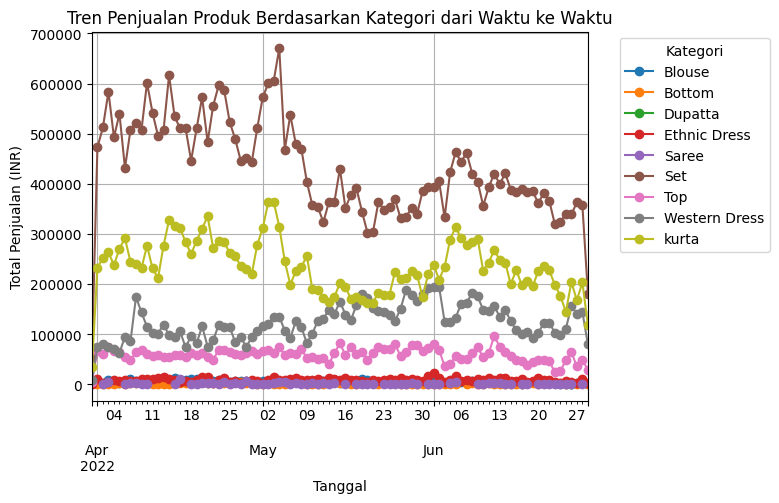

In [11]:
# Analisis tren penjualan berdasarkan kategori dari waktu ke waktu
sales_trend = data.groupby(['Date', 'Category'])['Amount'].sum().unstack()
plt.figure(figsize=(12, 6))
sales_trend.plot(marker='o')
plt.title('Tren Penjualan Produk Berdasarkan Kategori dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (INR)')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

**Best-Selling Products**

In [12]:
# Produk dan kategori paling laris berdasarkan jumlah pesanan dan total pendapatan
top_products = data.groupby(['SKU', 'Category']).agg({'Order ID': 'count', 'Amount': 'sum'}).reset_index()
top_products.columns = ['SKU', 'Category', 'Total Orders', 'Total Revenue']
top_products = top_products.sort_values(by='Total Revenue', ascending=False)

print("Produk dan Kategori Paling Laris:")
print(top_products.head(10))  # Menampilkan 10 produk teratas

Produk dan Kategori Paling Laris:
                  SKU       Category  Total Orders  Total Revenue
1346      J0230-SKD-M            Set           507      527699.20
4548     JNE3797-KR-L  Western Dress           773      524581.77
1347      J0230-SKD-S            Set           452      479937.14
4549     JNE3797-KR-M  Western Dress           657      454290.16
4550     JNE3797-KR-S  Western Dress           587      407302.57
4551    JNE3797-KR-XL  Western Dress           474      332155.24
1345      J0230-SKD-L            Set           297      305616.95
4552    JNE3797-KR-XS  Western Dress           431      303616.70
6305  SET268-KR-NP-XL            Set           386      284058.96
4554  JNE3797-KR-XXXL  Western Dress           386      276375.80


**Sales By States**

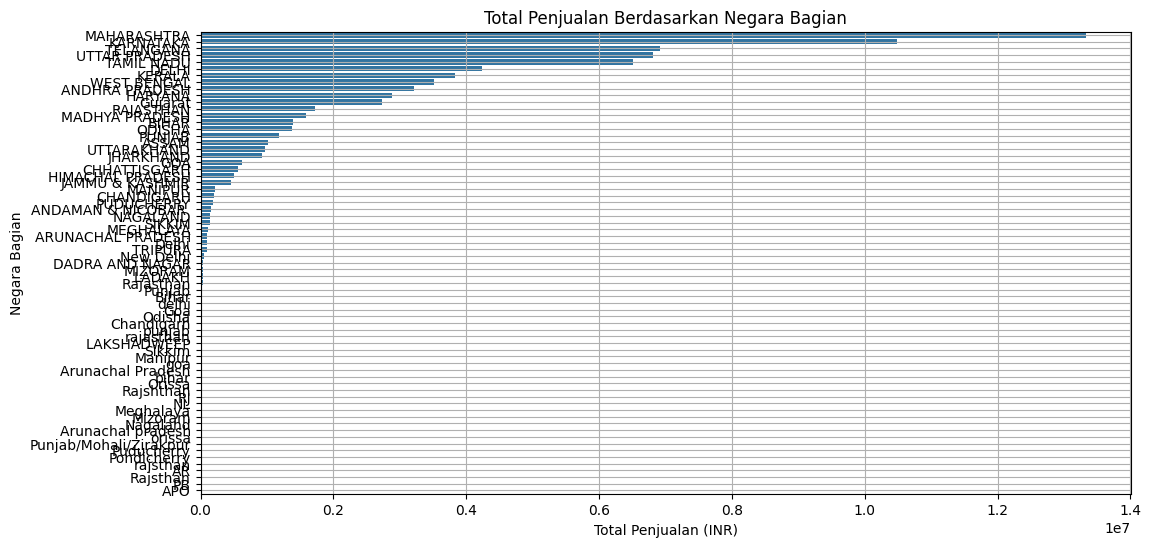

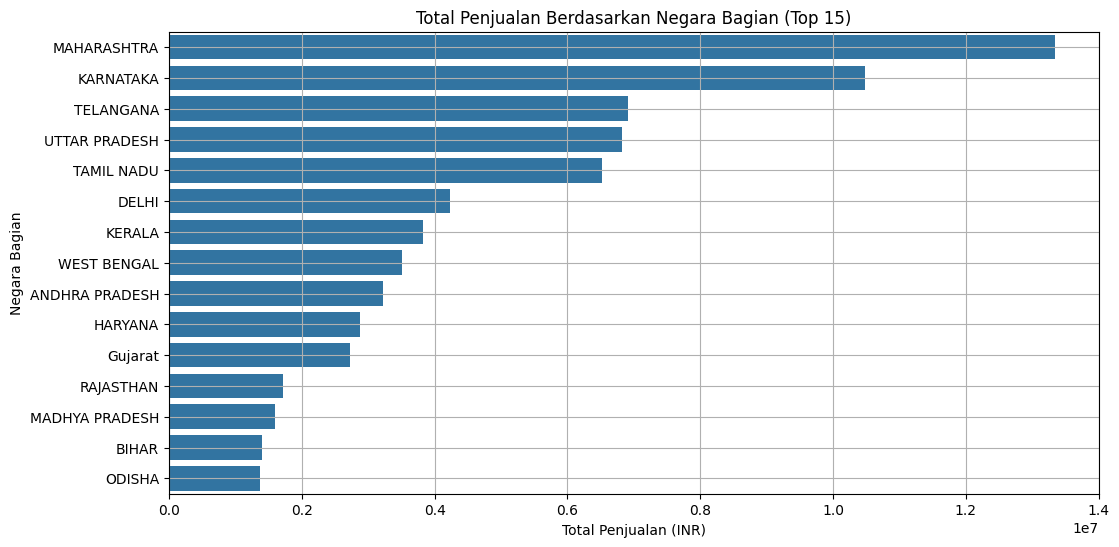

In [14]:
# Penjualan tertinggi berdasarkan negara bagian
sales_by_state = data.groupby('ship-state')['Amount'].sum().reset_index()
sales_by_state = sales_by_state.sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-state', data=sales_by_state)
plt.title('Total Penjualan Berdasarkan Negara Bagian')
plt.xlabel('Total Penjualan (INR)')
plt.ylabel('Negara Bagian')
plt.grid()
plt.show()

# Menampilkan hanya 15 negara bagian dengan penjualan tertinggi
top_15_states = sales_by_state.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-state', data=top_15_states)
plt.title('Total Penjualan Berdasarkan Negara Bagian (Top 15)')
plt.xlabel('Total Penjualan (INR)')
plt.ylabel('Negara Bagian')
plt.grid()
plt.show()


**Sales Distribution by City**

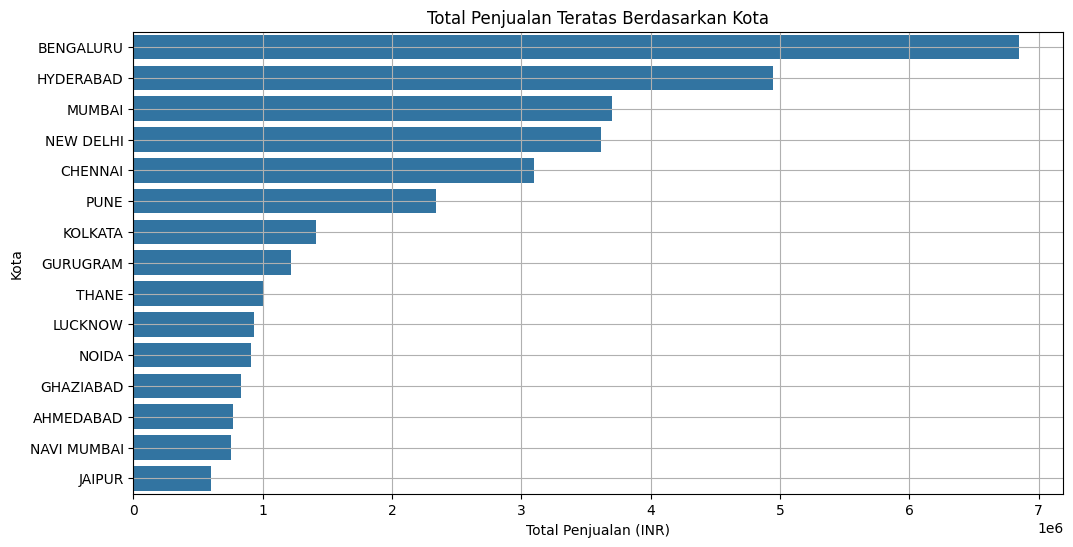

In [16]:
# Distribusi penjualan berdasarkan kota
sales_by_city = data.groupby('ship-city')['Amount'].sum().reset_index()
sales_by_city = sales_by_city.sort_values(by='Amount', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-city', data=sales_by_city)
plt.title('Total Penjualan Teratas Berdasarkan Kota')
plt.xlabel('Total Penjualan (INR)')
plt.ylabel('Kota')
plt.grid()
plt.show()

**Order Cancellation Analysis**
Menghitung dan memunculkan jumlah dan proporsi dari "Canceled Orders vs Fulfilled Orders"

In [17]:
# Menghitung pesanan yang dibatalkan dan dikirimkan tepat waktu
total_orders = len(data)
cancelled_orders = data[data['Status'] == 'Cancelled'].shape[0]
fulfilled_orders = total_orders - cancelled_orders

# Menghitung proporsi
proportion_cancelled = (cancelled_orders / total_orders) * 100
proportion_fulfilled = (fulfilled_orders / total_orders) * 100

print(f"Total Pesanan: {total_orders}")
print(f"Pesanan Dibatalkan: {cancelled_orders} ({proportion_cancelled:.2f}%)")
print(f"Pesanan Terpenuhi: {fulfilled_orders} ({proportion_fulfilled:.2f}%)")


Total Pesanan: 128975
Pesanan Dibatalkan: 18332 (14.21%)
Pesanan Terpenuhi: 110643 (85.79%)


**Conclusion**

Berdasarkan analisis menyeluruh terhadap data penjualan, kami dapat menarik beberapa kesimpulan yang signifikan mengenai dinamika pasar dan perilaku konsumen.

Pertama, tren penjualan berdasarkan kategori produk menunjukkan adanya fluktuasi permintaan yang bervariasi sepanjang waktu, di mana kategori tertentu menunjukkan pertumbuhan yang konsisten. Hal ini mengindikasikan bahwa perusahaan perlu memprioritaskan strategi pengadaan dan pemasaran untuk kategori-kategori tersebut guna memaksimalkan potensi pendapatan. Selain itu, identifikasi produk dan kategori terlaris melalui analisis jumlah pesanan dan total pendapatan memberikan wawasan penting tentang kontribusi masing-masing produk terhadap kinerja keseluruhan, serta potensi produk yang mungkin perlu ditingkatkan dalam hal visibilitas dan penawaran.

Analisis distribusi penjualan berdasarkan lokasi geografi juga memperlihatkan pola yang menarik, di mana beberapa negara bagian menunjukkan performa penjualan yang signifikan, sementara yang lain menunjukkan potensi yang belum tergarap. Temuan ini memberikan kesempatan bagi perusahaan untuk fokus dalam meningkatkan penetrasi pasar di area dengan penjualan rendah, melalui pendekatan pemasaran yang lebih agresif dan penawaran produk yang disesuaikan dengan preferensi lokal.

Terakhir, evaluasi status pemesanan mengungkapkan proporsi pesanan yang dibatalkan yang tinggi, yang menunjukkan adanya tantangan dalam proses pemenuhan dan mungkin berdampak negatif pada kepuasan pelanggan. Untuk itu, perlu dilakukan perbaikan dalam proses operasional dan manajemen layanan pelanggan agar dapat mengurangi tingkat pembatalan dan meningkatkan pengalaman pelanggan secara keseluruhan. Dengan memanfaatkan temuan dari analisis ini, perusahaan dapat merumuskan strategi yang lebih terarah dan berbasis data, yang tidak hanya meningkatkan penjualan dan efisiensi operasional tetapi juga membangun loyalitas pelanggan dan keunggulan kompetitif di pasar yang semakin kompetitif.